# Predicting fatality rates due to the novel Corona Virus

In [146]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import numpy as np

In [101]:
#pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=d1e151b6f625b66ea0cba2ef60532c5794d22fac4a10b39c8afb680bbb00aad8
  Stored in directory: C:\Users\ayshu\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Reading in the datafiles
#
covid_indicators = pd.read_csv("./Data/inform-covid-indicators.csv")
#
gov_measures = pd.read_csv("./Data/acaps-covid-19-government-measures-dataset.csv")
#
daily_dashboard = pd.read_csv("./Data/johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv")
#
train = pd.read_csv("./Data/train.csv")
#
test = pd.read_csv("./Data/test.csv")

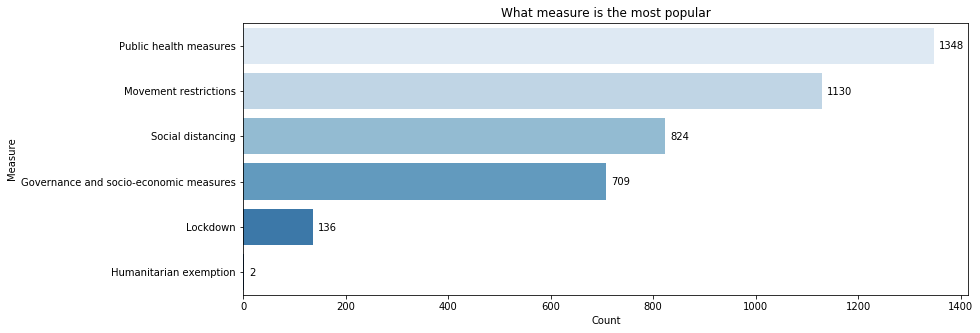

In [44]:
#Visualization
#What goverment measures are the most popular
gov_measure_by_category = gov_measures.groupby([gov_measures.category]).count()
gov_measure_by_category = gov_measure_by_category.sort_values(['id'], ascending=[False])
plt.figure(figsize=(13,5))
ax = sns.barplot(y
                 =gov_measure_by_category.index, x=gov_measure_by_category.id,  palette="Blues")
ax.set_title("What measure is the most popular")
ax.set_xlabel("Count")
ax.set_ylabel("Measure")
for p in ax.patches:
    ax.annotate("%d" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.7),
                xytext=(5, 10), textcoords='offset points')
plt.show()

In [84]:
#World wide trend from Jan 22nd to April 7th
#Train data contains the number of Confirmed and Fatalities  and new cases in all countries
world_wide_trend = train.groupby(['Date'])[['ConfirmedCases', 'Fatalities']].sum()
world_wide_trend['NewCases'] = world_wide_trend['ConfirmedCases'] - world_wide_trend['ConfirmedCases'].shift(1)
world_wide_trend
world_wide_trend_melted = pd.melt(world_wide_trend.reset_index(), id_vars=['Date'], value_vars=['ConfirmedCases', 'Fatalities', 'NewCases'])
world_wide_trend_melted = world_wide_trend_melted.rename(columns = {"variable":"Measure"}) 

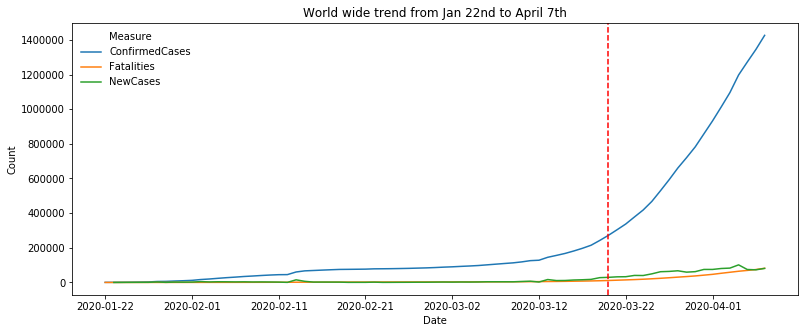

In [96]:
plt.figure(figsize=(13,5))
ax = sns.lineplot(x='Date', y='value', hue='Measure', data= world_wide_trend_melted)
ax.set_title("World wide trend from Jan 22nd to April 7th")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
ax.axvline("2020-03-20", color="red", linestyle="--")
leg = ax.legend()
ax.legend(loc='upper left', frameon=False)
plt.show()

In [220]:
#World heat map confirmed cases
country = train.groupby(['Date','Country_Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
country_latest = country[country['Date'] =='2020-04-07'].reset_index()
country_latest['logConfirmed']= np.log(country_latest['ConfirmedCases'])


In [171]:
worldmap = px.choropleth(country_latest, locations="Country_Region", 
                    locationmode='country names', color="logConfirmed", 
                    hover_name="Country_Region", hover_data=["ConfirmedCases"],
                    range_color=[country_latest['logConfirmed'].min(), country_latest['logConfirmed'].max()], 
                    color_continuous_scale="blues",
                    title='Countries with Confirmed Cases')
worldmap.update_layout(showlegend=False)
worldmap.show()

In [218]:
#Top 15 countries with highest Fatalities
country_latest= country_latest.sort_values(['Fatalities'], ascending=[False])
top_mortality = country_latest.head(15)
top_mortality =top_mortality[['Country_Region','Fatalities']]
top_mortality =top_mortality.sort_values(['Fatalities'], ascending=[True])

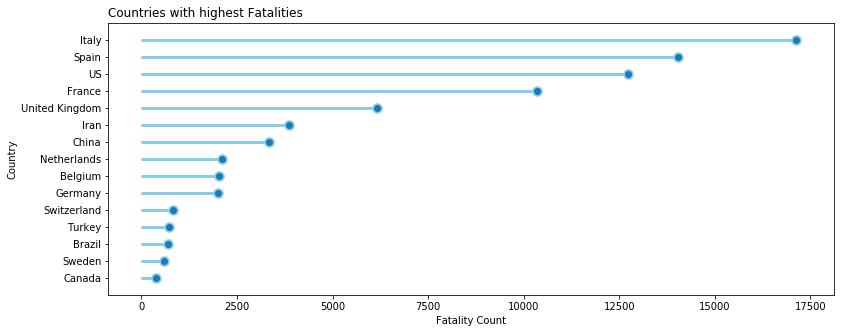

In [221]:
my_range=range(0,len(top_mortality['Fatalities']))
plt.figure(figsize=(13,5))
plt.hlines(y=top_mortality['Country_Region'], xmin=0, xmax=top_mortality['Fatalities'], color='skyblue', linewidth = 3)
plt.plot(top_mortality['Fatalities'], my_range, "o")
plt.scatter(top_mortality['Fatalities'], my_range, color='skyblue', s=90, alpha=1) 
# Add titles and axis names
plt.title("Countries with highest Fatalities", loc='left')
plt.xlabel('Fatality Count')
plt.ylabel('Country')
plt.show();


In [222]:
#Population density vs Confirmed Cases
country_latest


,index,Date,Country_Region,ConfirmedCases,Fatalities,logConfirmed
0,13680,2020-04-07,Afghanistan,423.0,14.0,6.047372
1,13681,2020-04-07,Albania,383.0,22.0,5.948035
2,13682,2020-04-07,Algeria,1468.0,193.0,7.291656
3,13683,2020-04-07,Andorra,545.0,22.0,6.300786
4,13684,2020-04-07,Angola,17.0,2.0,2.833213
...,...,...,...,...,...,...
175,13855,2020-04-07,Venezuela,165.0,7.0,5.105945
176,13856,2020-04-07,Vietnam,249.0,0.0,5.517453
177,13857,2020-04-07,West Bank and Gaza,261.0,1.0,5.564520
178,13858,2020-04-07,Zambia,39.0,1.0,3.663562
